## Importing Libraries

In [211]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## About The Data

In [253]:
df = pd.read_csv('auto-mpg.csv')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


# Section 1: Preprocessing and EDA 

In [34]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       94
weight          351
acceleration     95
model year       13
origin            3
car name        305
dtype: int64

In [35]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [36]:
df.duplicated().sum()

0

<AxesSubplot:xlabel='origin', ylabel='count'>

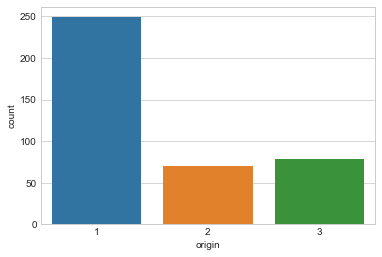

In [37]:
sns.countplot('origin', data = df)

<AxesSubplot:>

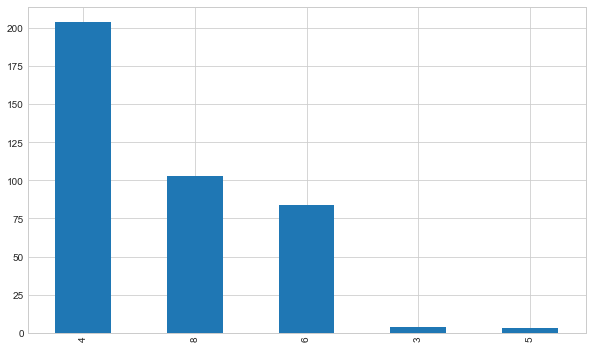

In [38]:
plt.figure(figsize = (10,6))
df['cylinders'].value_counts().plot(kind = 'bar')

In [155]:
df.horsepower.value_counts()

150    22
90     20
88     19
110    18
100    17
       ..
61      1
93      1
148     1
152     1
82      1
Name: horsepower, Length: 94, dtype: int64

In [156]:
df.horsepower.dtype

dtype('O')

In [225]:
(df['horsepower']=='?').value_counts()

False    392
True       6
Name: horsepower, dtype: int64

In [254]:
df = df.drop(df[df['horsepower']=='?'].index)

In [255]:
df.shape

(392, 9)

In [256]:
df['horsepower'] = df['horsepower'].astype(str).astype(int)  # converting str type into int type

In [257]:
df['origin'] = df['origin'].map({1:'USA',2:'Japan',3:'India'})

In [138]:
df.origin.unique()

array(['USA', 'India', 'Japan'], dtype=object)

<AxesSubplot:xlabel='mpg', ylabel='Count'>

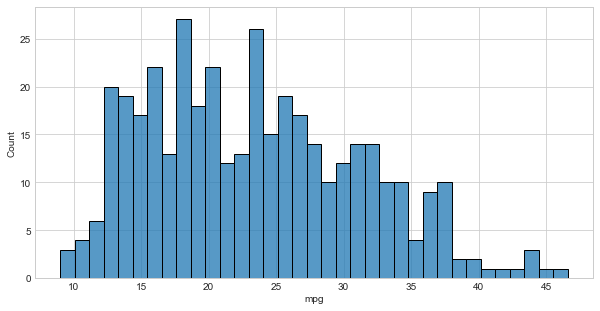

In [139]:
plt.figure(figsize = (10,5))
sns.histplot(df['mpg'], bins = 35)

<AxesSubplot:xlabel='cylinders', ylabel='mpg'>

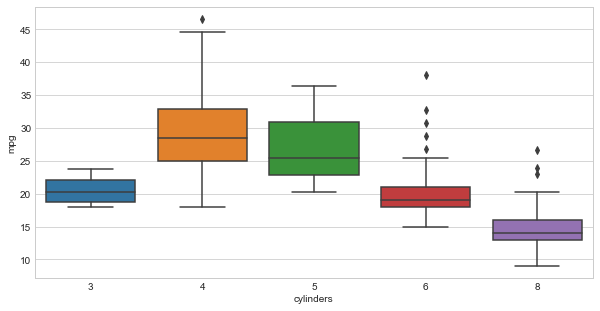

In [54]:
plt.figure(figsize = (10,5))
sns.boxplot('cylinders', 'mpg', data = df)

<AxesSubplot:xlabel='cylinders', ylabel='count'>

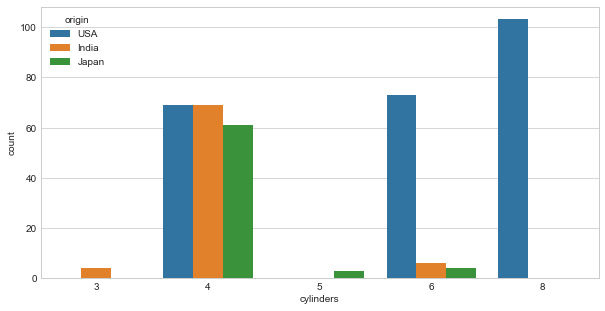

In [55]:
plt.figure(figsize = (10,5))
sns.countplot('cylinders', hue = 'origin', data = df)

<AxesSubplot:xlabel='weight', ylabel='acceleration'>

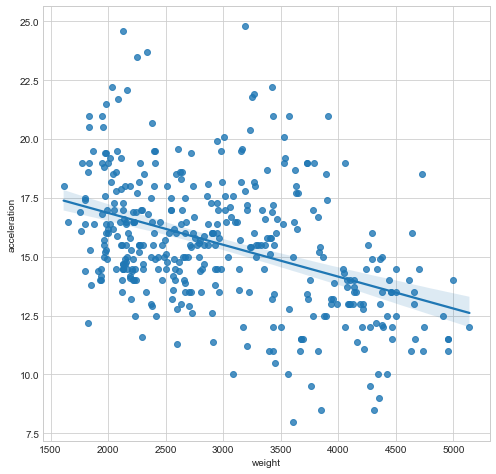

In [57]:
plt.figure(figsize = (8,8))
sns.regplot('weight', 'acceleration', data = df)

__As the weight of car is increasing, acceleration is decreasing at the same time.__

<AxesSubplot:xlabel='displacement', ylabel='acceleration'>

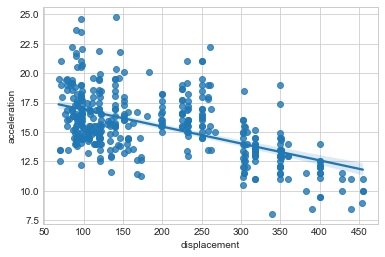

In [59]:
sns.regplot('displacement', 'acceleration', data = df)

In [62]:
df['model year'].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], dtype=int64)

<AxesSubplot:xlabel='model year', ylabel='mpg'>

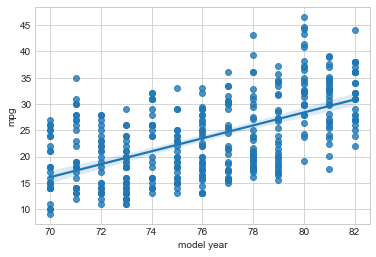

In [66]:
sns.regplot(x = 'model year', y = 'mpg', data = df)

In [67]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

<AxesSubplot:xlabel='model year', ylabel='count'>

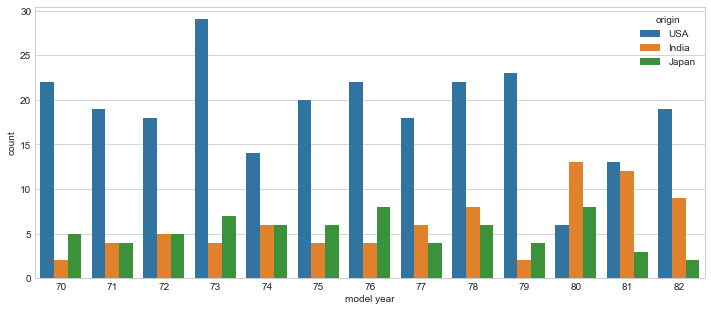

In [74]:
plt.figure(figsize = (12,5))
sns.countplot('model year',hue = 'origin', data = df)

In [185]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,392.0,23.445918,7.805007,9.0,17.000,22.75,29.000,46.6
cylinders,392.0,5.471939,1.705783,3.0,4.000,4.00,8.000,8.0
displacement,392.0,194.411990,104.644004,68.0,105.000,151.00,275.750,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.50,126.000,230.0
weight,392.0,2977.584184,849.402560,1613.0,2225.250,2803.50,3614.750,5140.0
acceleration,392.0,15.541327,2.758864,8.0,13.775,15.50,17.025,24.8
model year,392.0,75.979592,3.683737,70.0,73.000,76.00,79.000,82.0


In [140]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316
model year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000


<AxesSubplot:xlabel='origin'>

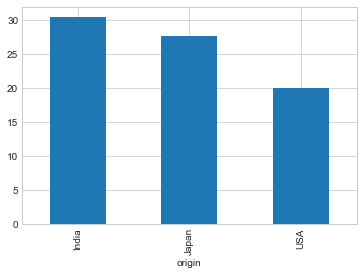

In [141]:
df.groupby('origin').mean()['mpg'].plot(kind = 'bar')

<AxesSubplot:xlabel='cylinders'>

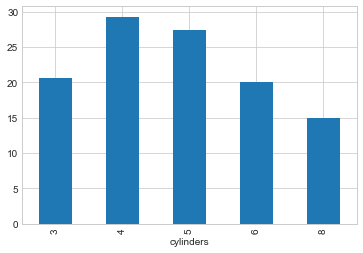

In [97]:
df.groupby('cylinders').mean()['mpg'].plot(kind = 'bar')

<AxesSubplot:xlabel='cylinders'>

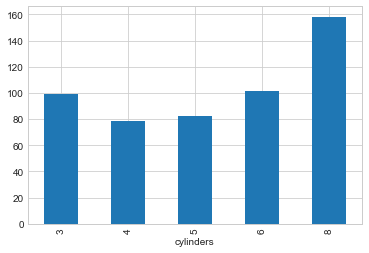

In [142]:
df.groupby('cylinders').mean()['horsepower'].plot(kind = 'bar')

__Car of 8 cylinders having highest horse power.__

<AxesSubplot:xlabel='cylinders'>

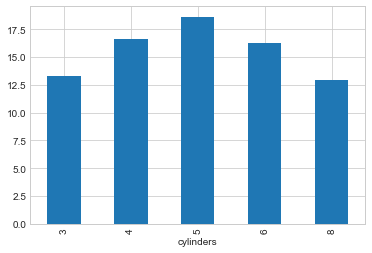

In [100]:
df.groupby('cylinders').mean()['acceleration'].plot(kind = 'bar')

<AxesSubplot:xlabel='model year'>

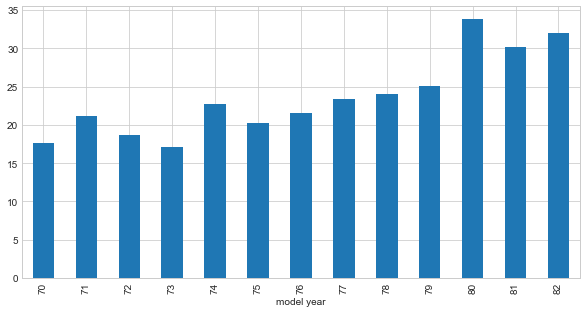

In [105]:
plt.figure(figsize = (10, 5))
df.groupby('model year').mean()['mpg'].plot(kind = 'bar')

__Car which is manufactured in year 80 had highest mileage.__

<AxesSubplot:xlabel='weight'>

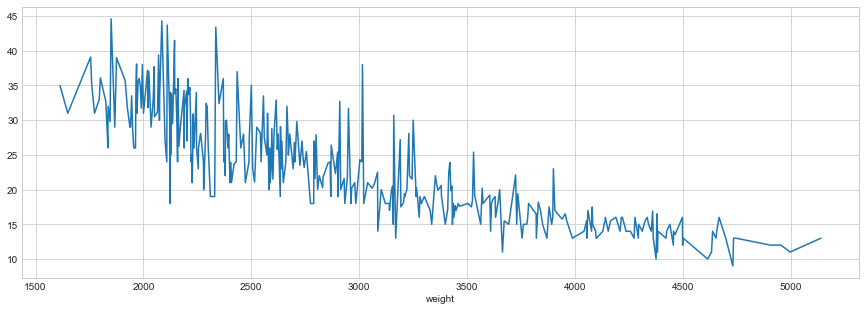

In [104]:
plt.figure(figsize = (15,5))
df.groupby('weight').mean()['mpg'].plot(kind = 'line')

__As we can see that on increasing the weight, mileage is decreasing.__

<AxesSubplot:xlabel='horsepower'>

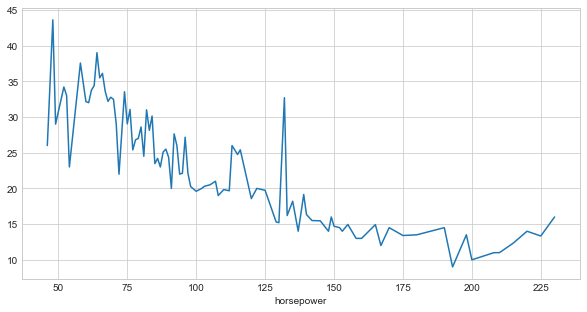

In [148]:
plt.figure(figsize = (10,5))
df.groupby('horsepower').mean()['mpg'].plot(kind = 'line')

+ __Mileage is decreasing as horse power is decreasing.__

<AxesSubplot:>

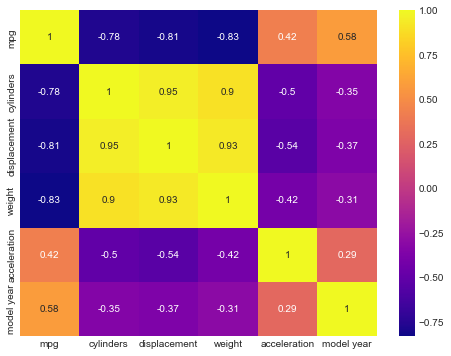

In [110]:
plt.figure(figsize = (8,6))
sns.heatmap(df.corr(), annot = True, cmap = 'plasma')

<AxesSubplot:>

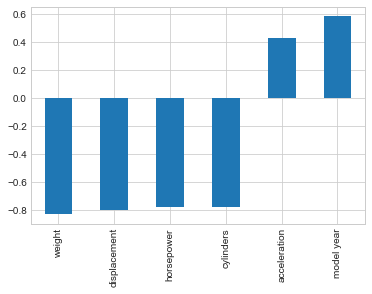

In [143]:
df.corr()['mpg'].sort_values().drop('mpg').plot(kind = 'bar')

<AxesSubplot:xlabel='cylinders', ylabel='displacement'>

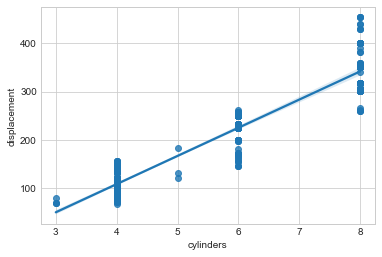

In [86]:
sns.regplot('cylinders', 'displacement', data = df)

__As the number of cylinders areincreasing, displace is also increasing.__

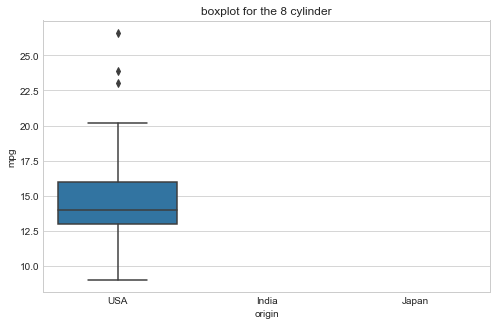

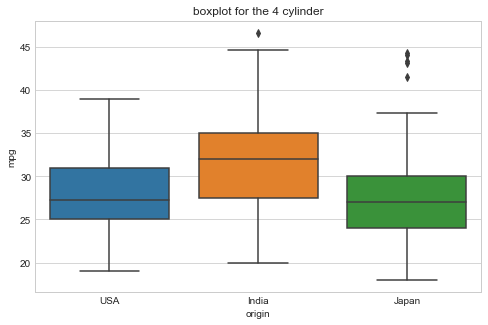

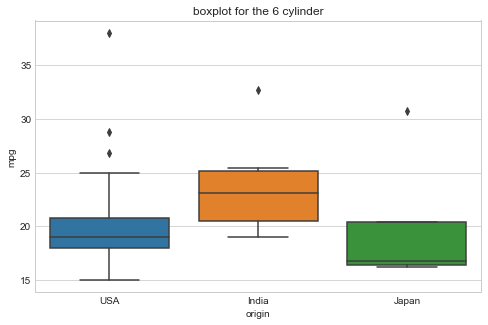

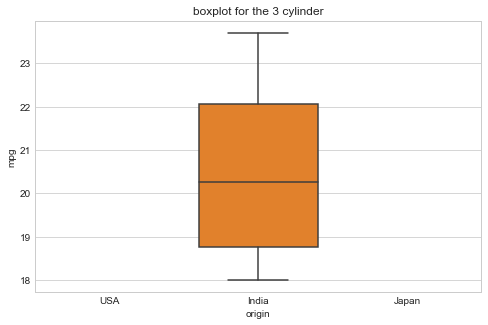

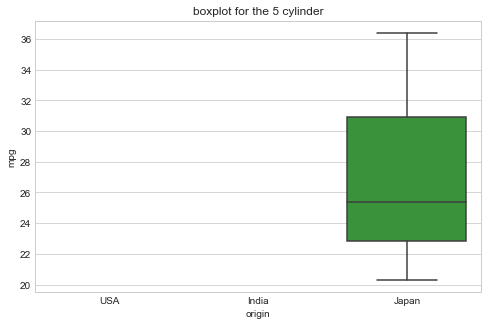

In [116]:
for i in df['cylinders'].unique():
    plt.figure(figsize = (8,5))
    sns.boxplot(x = 'origin', y = df[df['cylinders']== i]['mpg'], data = df)
    plt.title(f'boxplot for the {i} cylinder')
    plt.show()

In [258]:
df = df.drop('car name', axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int32  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    object 
dtypes: float64(3), int32(1), int64(3), object(1)
memory usage: 26.0+ KB


+ __Here mpg is our target variable rest of all are feature variables.__

In [259]:
df = df.drop('origin', axis = 1)

# Section 2: Modelling using ML and DL 

### Scalling the Data

In [260]:
df_train = df.sample(frac = 0.7, random_state = 0)
df_test = df.drop(df_train.index)

In [272]:
Max = df_train.max(axis = 0)
Min = df_train.min(axis = 0)
df_train = (df_train - Min) / (Max - Min)
df_test = (df_test - Min) / (Max - Min)
df_train.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
146,0.491803,0.2,0.056848,0.162011,0.142174,0.386905,0.333333
282,0.336066,0.2,0.186047,0.234637,0.370669,0.553571,0.750000
69,0.054645,1.0,0.728682,0.636872,0.838411,0.327381,0.166667
378,0.765027,0.2,0.095607,0.094972,0.142174,0.398810,1.000000
331,0.650273,0.2,0.074935,0.117318,0.148148,0.595238,0.833333


In [262]:
X_train = df_train.drop('mpg', axis = 1)
X_test = df_test.drop('mpg', axis = 1)
y_train = df_train['mpg']
y_test = df_test['mpg']

### Linear Regression

In [263]:
from sklearn.linear_model import LinearRegression

In [264]:
lr = LinearRegression()

In [265]:
lr.fit(X_train, y_train)

LinearRegression()

In [266]:
pred = lr.predict(X_test)

In [267]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

<AxesSubplot:xlabel='mpg'>

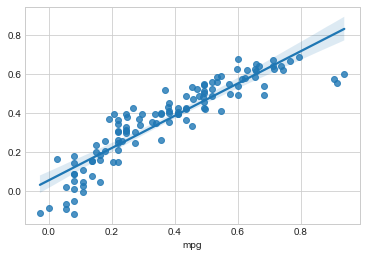

In [268]:
sns.regplot(y_test, pred)

In [269]:
print(f'MAE: {mean_absolute_error(y_test, pred)}')

MAE: 0.07081929990596171


In [270]:
print(f'MSE: {mean_squared_error(y_test, pred)}')

MSE: 0.009073203319158564


In [271]:
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, pred))}')

RMSE: 0.0952533638206996


### Normal Deep Learning 

In [273]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks
from tensorflow.keras.callbacks import EarlyStopping

#### Model

In [308]:
model = keras.Sequential([
    layers.Dense(512, activation = 'relu', input_shape = [6]),
    layers.Dense(512, activation = 'relu'),
    layers.Dense(1)
])

model.compile(optimizer = 'adam',
             loss = 'mae')

#### Evaluation

In [309]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 200, verbose = 0)

In [289]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

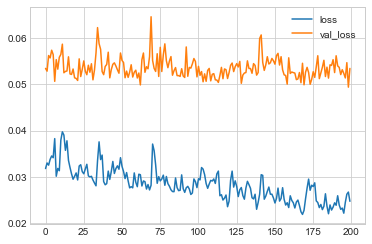

In [290]:
losses.plot()

### Deep Learning with modified model and also using Early Stopping

#### Model

In [310]:
early_stopping = EarlyStopping(min_delta = 0.0001,
                             patience = 90, 
                             restore_best_weights = True)

model = keras.Sequential([
    layers.Dense(512, activation = 'relu', input_shape = [6]),
    layers.Dense(512, activation = 'relu'),
    layers.Dense(256, activation = 'relu'),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(1)
])

model.compile(optimizer = 'adam',
             loss = 'mae')

#### Evaluation

In [311]:
model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=300,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=0,  # turn off training log
)

In [305]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

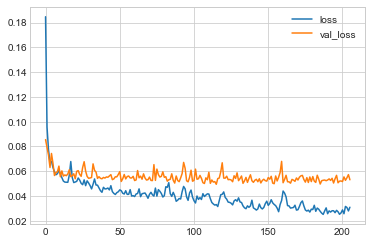

In [306]:
losses.plot()

In [314]:
from sklearn.metrics import mean_absolute_error 

In [315]:
print(f'MAE: {mean_absolute_error(y_test,(model.predict(X_test)))}')

4/4 [==============================] - 9s 39ms/step
MAE: 0.0486103663436818


__Accuracy of the model is increased very much because of refine the model and using EarlyStopping.__

## Thank You